# Area per lipid predictor

This is code is optimising hyperparameters for different machine learning models to predict area per lipids of membranes based on their lipid composition. Simulations from the NMRlipids databank are used as the training set. The resulting models are stored in `../Data/APLpredictor/` folder. 

Starting from [cell below](#another_cell), the Linear regression model is loaded and area per lipids corresponding different cellular membrane compositions are predicted.

# Intialize NMRlipids databank

In [1]:
import os
import sys
import numpy as np
import json
import matplotlib.pyplot as plt
import MDAnalysis
import urllib.request
import yaml
import random
import collections
import pandas as pd

# This defines the path for the NMRlipids databank on your computer. 
# Default is that this repository and the NMRlipids databank repository are cloned to the same folder.
# If this is not the case, change this to the folder where the NMRlipids databank repository is located.
databankPath =  '../../Databank/'

# This enales the access to functions defined in the NMRlipids databank.
sys.path.insert(1, databankPath + '/Scripts/BuildDatabank/')
from databankLibrary import * 

# This initializes the databank and stores the information of all simulations into a list.
# Each list item contains the information from README.yaml file of the given simulation.
systems = initialize_databank(databankPath)

Databank initialized from the folder: /home/sosamuli/work/NMRlipids/Databank/Data/Simulations


In [2]:
def molNumbers2molFractions(CompDict):

    Nlipids = 0
    for i in CompDict:
        Nlipids += CompDict[i]
    print('Number of lipids: ',Nlipids)

    fracArray = []
    lipidArray = []
    for i in CompDict:
        lipidArray.append(i)
        fracArray.append(CompDict[i]/Nlipids)
    
    return lipidArray, fracArray

def append2testDict(lipids,fractions,lipidnames,literature,testAgainstLiterature,literatureNumber,model):
    single_pred=model.predict(APLquery(lipids, fractions, lipidnames))
    print('Difference betweer predicted and literature (ML prediction and difference): ', single_pred[0], single_pred[0]-literature)
    print('Sum of fractions (should be 1): ', sum(fractions),'\n')
    testAgainstLiterature[0].append(single_pred[0])
    testAgainstLiterature[1].append(literature)
    testAgainstLiterature[2].append(literatureNumber)
    

def makeTestAgainstLiterature(lipidHGnamesList,model):

    testAgainstLiterature = [[],[],[]]
    
    print('REF: Shahane et al. 2019')
        
    print('bacterial membrane')
    CompDict={
        'PElipids': 88,
        'PGlipids': 44
    }
    comp = molNumbers2molFractions(CompDict)
    literature= 56.8
    append2testDict(comp[0],comp[1],lipidHGnamesList,literature,testAgainstLiterature,0,model)
 
    print('mammalian membrane')
    lips=['PClipids', 'PElipids', 'PIlipids','PSlipids','CHOL','SMlipids']
    comp=[0.18,0.21,0.0,0.11,0.34,0.16]
    literature= 42.1
    append2testDict(lips,comp,lipidHGnamesList,literature,testAgainstLiterature,0,model)

  
    print('cancer membrane')
    lips=['PClipids', 'PElipids', 'PIlipids','PSlipids','CHOL','SMlipids']
    comp=[0.2,0.25,0.0,0.22,0.17,0.17]
    literature = 46.1
    append2testDict(lips,comp,lipidHGnamesList,literature,testAgainstLiterature,0,model)
    
  
    print('REF: Kumar et al. 2021')

    print('M13')
    lips=['PClipids', 'PElipids', 'PIlipids','PSlipids','CHOL','SMlipids']
    comp=[0.172,0.172,0.164,0.164,0.164,0.164]
    literature = 49.06
    append2testDict(lips,comp,lipidHGnamesList,literature,testAgainstLiterature,1,model)

    print('M12')
    lips=['PClipids', 'PElipids', 'PIlipids','PSlipids','CHOL','SMlipids']
    comp=[0.352,0.352,0.07,0.07,0.078,0.078]
    literature = 54.97
    append2testDict(lips,comp,lipidHGnamesList,literature,testAgainstLiterature,1,model)

    print('M11')
    lips=['PClipids', 'PElipids', 'PIlipids','PSlipids','CHOL','SMlipids']
    comp=[0.352,0.352,0.078,0.078,0.07,0.07]
    literature = 54.62
    append2testDict(lips,comp,lipidHGnamesList,literature,testAgainstLiterature,1,model)

    print('M10')
    lips=['PClipids', 'PElipids', 'PIlipids','PSlipids','CHOL','SMlipids']
    comp=[0.352,0.352,0.102,0.094,0.054,0.046]
    literature = 55.84
    append2testDict(lips,comp,lipidHGnamesList,literature,testAgainstLiterature,1,model)

    print('M9')
    lips=['PClipids', 'PElipids', 'PIlipids','PSlipids','CHOL','SMlipids']
    comp=[0.25,0.25,0.0,0.0,0.25,0.25]
    literature = 45.54
    append2testDict(lips,comp,lipidHGnamesList,literature,testAgainstLiterature,1,model)

    print('M8')
    lips=['PClipids', 'PElipids', 'PIlipids','PSlipids','CHOL','SMlipids']
    comp=[0.25,0.25,0.25,0.25,0.0,0.0]
    literature = 58.47
    append2testDict(lips,comp,lipidHGnamesList,literature,testAgainstLiterature,1,model)

    print('M7') 
    lips=['PClipids', 'PElipids', 'PIlipids','PSlipids','CHOL','SMlipids']
    comp=[0.336,0.332,0.0,0.0,0.332,0.0]
    literature = 45.8
    append2testDict(lips,comp,lipidHGnamesList,literature,testAgainstLiterature,1,model)

    print('M6')
    lips=['PClipids', 'PElipids', 'PIlipids','PSlipids','CHOL','SMlipids']
    comp=[0.336,0.332,0.0,0.0,0.0,0.332]
    literature = 56.8
    append2testDict(lips,comp,lipidHGnamesList,literature,testAgainstLiterature,1,model)

    print('M5')
    lips=['PClipids', 'PElipids', 'PIlipids','PSlipids','CHOL','SMlipids']
    comp=[0.34,0.332,0.0,0.328,0.0,0.0]
    literature = 59.7
    append2testDict(lips,comp,lipidHGnamesList,literature,testAgainstLiterature,1,model)

    print('M4')
    lips=['PClipids', 'PElipids', 'PIlipids','PSlipids','CHOL','SMlipids']
    comp=[0.336,0.336,0.328,0.0,0.0,0.0]
    literature = 57.06
    append2testDict(lips,comp,lipidHGnamesList,literature,testAgainstLiterature,1,model)

    print('M3')
    lips=['PClipids', 'PElipids', 'PIlipids','PSlipids','CHOL','SMlipids']
    comp=[0.5,0.5,0.0,0.0,0.0,0.0]
    literature = 59.52
    append2testDict(lips,comp,lipidHGnamesList,literature,testAgainstLiterature,1,model)

    print('M2')
    lips=['PClipids', 'PElipids', 'PIlipids','PSlipids','CHOL','SMlipids']
    comp=[0.0,1.0,0.0,0.0,0.0,0.0]
    literature = 57.02
    append2testDict(lips,comp,lipidHGnamesList,literature,testAgainstLiterature,1,model)

    print('M1')
    lips=['PClipids', 'PElipids', 'PIlipids','PSlipids','CHOL','SMlipids']
    comp=[1.0,0.0,0.0,0.0,0.0,0.0]
    literature = 64.81
    append2testDict(lips,comp,lipidHGnamesList,literature,testAgainstLiterature,1,model)
    
    
    print('REF: Oliveira et al. 2022')

    print('M1')
    lips=['PClipids', 'PElipids','PSlipids','PIlipids']
    comp=[0.59,0.31,0.0,0.1]
    literature = 62.1
    append2testDict(lips,comp,lipidHGnamesList,literature,testAgainstLiterature,3,model)


    print('M2')
    lips=['PClipids', 'PElipids','PSlipids','PIlipids']
    comp=[0.57,0.31,0.02,0.1]
    literature = 62.0
    append2testDict(lips,comp,lipidHGnamesList,literature,testAgainstLiterature,3,model)

    print('M3')
    lips=['PClipids', 'PElipids','PSlipids','PIlipids']
    comp=[0.50,0.24,0.2,0.06]
    literature = 61.7
    append2testDict(lips,comp,lipidHGnamesList,literature,testAgainstLiterature,3,model)

    print('M4')
    lips=['PClipids', 'PElipids','PSlipids','PIlipids']
    comp=[0.43,0.17,0.39,0.01]
    literature = 61.6
    append2testDict(lips,comp,lipidHGnamesList,literature,testAgainstLiterature,3,model)

    print('M5')
    lips=['PClipids', 'PElipids','PSlipids','PIlipids']
    comp=[0.57,0.43,0.0,0.0]
    literature = 61.2
    append2testDict(lips,comp,lipidHGnamesList,literature,testAgainstLiterature,3,model)

    return testAgainstLiterature

# Extracting data from the databank

In [3]:
# Determing which lipids are in the databank. Counting their frequency and excluding the ones with few occurrenses.
lipids = []
for system in systems:
    for lipid in system['COMPOSITION']:
    
        if lipid in lipids_dict:
            lipids.append(lipid)
counter = collections.Counter(lipids)
Freqlipids = {}
less = {}
for i in counter:
    if counter[i] >0:
        Freqlipids[i] = counter[i]

print(Freqlipids)
lipidnames=list(Freqlipids.keys())
print(lipidnames)

{'POPC': 480, 'CHOL': 189, 'DMPC': 15, 'DMTAP': 9, 'DPPC': 73, 'DOPS': 13, 'POPE': 59, 'DOPC': 38, 'POPS': 86, 'POPG': 63, 'DRPC': 3, 'DAPC': 15, 'DOPE': 8, 'SDG': 4, 'SAPI24': 1, 'SM16': 5, 'CER': 5, 'DLIPC': 6, 'TLCL_0H': 3, 'SM18': 2, 'PYPC': 3, 'GM1': 3, 'DLPC': 8, 'DHMDMAB': 13, 'DOG': 4, 'POPI': 2, 'CER180': 1, 'DYPC': 3, 'TOCL': 5, 'SOPC': 6, 'SAPI25': 6, 'DSPC': 2, 'SLiPC': 3, 'SAPI': 1, 'SLPI': 1, 'DEPC': 1, 'PAzePCprot': 1, 'DPPGK': 1, 'SDPE': 4, 'DDOPC': 2, 'PAzePCdeprot': 1, 'DPPG': 2, 'DPPE': 3, 'DCHOL': 2}
['POPC', 'CHOL', 'DMPC', 'DMTAP', 'DPPC', 'DOPS', 'POPE', 'DOPC', 'POPS', 'POPG', 'DRPC', 'DAPC', 'DOPE', 'SDG', 'SAPI24', 'SM16', 'CER', 'DLIPC', 'TLCL_0H', 'SM18', 'PYPC', 'GM1', 'DLPC', 'DHMDMAB', 'DOG', 'POPI', 'CER180', 'DYPC', 'TOCL', 'SOPC', 'SAPI25', 'DSPC', 'SLiPC', 'SAPI', 'SLPI', 'DEPC', 'PAzePCprot', 'DPPGK', 'SDPE', 'DDOPC', 'PAzePCdeprot', 'DPPG', 'DPPE', 'DCHOL']


In [4]:
lipidHGnames = {
    'PClipids': [],
    'PElipids': [],
    'PSlipids': [],
    'PGlipids': [],
    'PIlipids': [],
    'SMlipids': [],
    'CLlipids': [],
    'CHOL': []
}
    
for lipid in lipidnames:
    if 'POPC' in lipid:
        lipidHGnames['PClipids'].append(lipid)
    if 'POPE' in lipid:
        lipidHGnames['PElipids'].append(lipid)
    if 'POPS' in lipid:
        lipidHGnames['PSlipids'].append(lipid)
    if 'POPG' in lipid:
        lipidHGnames['PGlipids'].append(lipid)
    if 'PI' in lipid:
        lipidHGnames['PIlipids'].append(lipid)
    if 'SM' in lipid:
        lipidHGnames['SMlipids'].append(lipid)
    if 'CL' in lipid:
        lipidHGnames['CLlipids'].append(lipid)
    if lipid == 'CHOL':
        lipidHGnames['CHOL'].append(lipid)

print(lipidHGnames)
lipidHGnamesList = list(lipidHGnames.keys())
print(lipidHGnamesList)

{'PClipids': ['POPC'], 'PElipids': ['POPE'], 'PSlipids': ['POPS'], 'PGlipids': ['POPG'], 'PIlipids': ['SAPI24', 'POPI', 'SAPI25', 'SAPI', 'SLPI'], 'SMlipids': ['SM16', 'SM18'], 'CLlipids': ['TLCL_0H', 'TOCL'], 'CHOL': ['CHOL']}
['PClipids', 'PElipids', 'PSlipids', 'PGlipids', 'PIlipids', 'SMlipids', 'CLlipids', 'CHOL']


In [5]:
data_array=[]

for system in systems:
#confirming that all lipids in the mixture are frequent    
        allinFreq=False
        for lipid in system['COMPOSITION']:
            if (lipid in lipids_dict) and (lipid in Freqlipids):
                allinFreq=True
        if allinFreq==False:
                continue
            
#proceeding to extract data for systems with frequent lipids
        tmp=[0]*(len(lipidHGnamesList)+2)
        for lipid in system['COMPOSITION']:
            for HGtype in lipidHGnamesList:
                if lipid in lipidHGnames[HGtype]:
                    tmp[lipidHGnamesList.index(HGtype)]=sum(system['COMPOSITION'][lipid]['COUNT']) / GetNlipids(system)
   
                #except:
                #    print("couldn't calculate the composition")   
        try:
            #choosing the properties which to include into data
            #tmp[-1]=GetThickness(system)
            tmp[-1]=CalcAreaPerMolecule(system)
            tmp[-2]=system['TEMPERATURE']
            data_array.append(tmp)      
        except:
            print('Skipped ' + system['path']+'. Could not calculate APL')
            continue

print(len(data_array))

765


In [6]:
## Tranforming the data to pandas dataframe

In [7]:
from sklearn.model_selection import train_test_split
#make the column titles:
colnames=lipidHGnamesList.copy()
colnames.append('TEMP')
colnames.append('APL')
data=pd.DataFrame(data_array, columns=colnames)

data
    
#dropping temperature for now, dividing rest to Y and X for test and train datasets

Y=data['APL']
X=data.drop(columns=['APL', 'TEMP'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

# Training of the model

## Useful packages and functions


In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import pearsonr
import time
import joblib

def APLquery(lipids, fractions, lipidnames):
    #Note! For now, no errors are thrown for fractions that sum to !=0 or lipids that are not included in the training. The function will just crash.
    qout=np.zeros((1,len(lipidnames)))
    for i, lipid in enumerate(lipids):
        qout[0,lipidnames.index(lipid)]=fractions[i]
    return qout

def score(y_test, y_pred): 
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    p=pearsonr(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2, p[0]
    

# Searching through a lot of models and their hyperparameters

In [9]:
#doing the (model) grid search in two part, you can run this several times and adjust the grid accordingly. You can also add/remove hyperparameters

param_grid1 = {'LinearRegression': {},
              'Lasso': {'alpha': [0.001,0.005 ,0.01, 0.05, 0.1, 1.0, 10.0]},
              'Ridge': {'alpha': [0.001, 0.01,0.05, 0.1, 0.5, 1.0, 10.0]},
              'ElasticNet': {'alpha': [0.05, 0.1, 0.5 ,1.0,  10.0],
                             'l1_ratio': [0.25, 0.5, 0.6 ,0.75, 0.9]},
              'DecisionTreeRegressor': {'max_depth': [None, 3, 5, 6, 7, 8, 10]},
              'RandomForestRegressor': {'n_estimators': [25, 50, 100, 150],
                                        'max_depth': [None, 3, 5, 6,7],
                                        'min_samples_split': [2, 4,5, 6, 10],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        #the value of auto vs 1 depends on the version
                                        'max_features': ['auto',1]}
             }

param_grid2={ 'GradientBoostingRegressor': {'n_estimators': [25, 50, 75, 100, 150],
                                            'learning_rate': [0.01,0.5,0.1, 1],
                                            'max_depth': [None, 3, 5, 7, 10]}, 
             'AdaBoostRegressor': {'n_estimators': [50, 100, 200],
                                    'learning_rate': [0.01, 0.05 ,0.1, 0.5]},

              'KNeighborsRegressor': {'n_neighbors': [3, 5, 7, 10, 13]},
              'MLPRegressor': {'hidden_layer_sizes': [(25,), (50,), (100,), (25,25) ,(50, 50)],
                               'activation': ['relu', 'tanh'],
                               'alpha': [0.0001,0.0005 ,0.001, 0.01],
                               'max_iter': [750]},
              'XGBRegressor': {'n_estimators': [25, 50,75,100],
                                        'max_depth': [None,3, 5, 6, 8],
                                        'learning_rate': [0.05, 0.1, 0.25, 0.5]}            
             }

models1 = {'LinearRegression': LinearRegression(),
          'Lasso': Lasso(),
          'Ridge': Ridge(),
          'ElasticNet': ElasticNet(),
          'DecisionTreeRegressor': DecisionTreeRegressor(),
          'RandomForestRegressor': RandomForestRegressor()
         }

models2 = {
          'GradientBoostingRegressor': GradientBoostingRegressor(),
          'AdaBoostRegressor': AdaBoostRegressor(),
          'KNeighborsRegressor': KNeighborsRegressor(),
          'MLPRegressor': MLPRegressor(),
          'XGBRegressor':  XGBRegressor()
            
         }


In [10]:
log_f = open('../Data/APLpredictor/gridsearch_log.txt', 'a')
for model_name, model in models1.items():
    t_start=time.perf_counter()
    os.makedirs(f'../Data/APLpredictor/{model_name}', exist_ok=True)
    log_f.write(f'---- {model_name} ----\n\n')
    
    model_param_grid = param_grid1[model_name]
    #5 fold cross validation with n_jobs workers, -1 means no parallelisation
    g_cv = GridSearchCV(model, param_grid=model_param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=2)
    g_cv.fit(X_train.values, y_train)
    log_f.write(f'Best model parameters: {g_cv.best_params_}\n')
    log_f.write(f'GridSearchCV fit: {g_cv.score(X_train.values, y_train)}\n\n')
    
    y_pred = g_cv.predict(X_test.values)
    mae, rmse, r2, pval = score(y_test, y_pred)
    log_f.write(f"Metrics in test set\n")

    y_pred_train = g_cv.predict(X_train.values)
    mae, rmse, r2, pval = score(y_train, y_pred_train)
    mae, rmse, r2, pval = score(y_train, y_pred_train)
    log_f.write(f"MAE: {mae:.3f}\n")
    log_f.write(f"RMSE: {rmse:.3f}\n")
    log_f.write(f"R2: {r2:.3f}\n")
    log_f.write(f"Pearson: {pval:.3f}\n\n")
    
    log_f.write(f"Metrics in training set\n")
    y_pred = g_cv.predict(X_test.values)
    mae, rmse, r2, pval = score(y_test, y_pred)
    log_f.write(f"MAE: {mae:.3f}\n")
    log_f.write(f"RMSE: {rmse:.3f}\n")
    log_f.write(f"R2: {r2:.3f}\n")
    log_f.write(f"Pearson: {pval:.3f}\n\n")
    
    joblib.dump(g_cv.best_estimator_, f'../Data/APLpredictor/{model_name}/model.pkl')
    print(f'{model_name} was finalized in {time.perf_counter()-t_start:0.4f} seconds')

log_f.close()

LinearRegression was finalized in 0.7970 seconds
Lasso was finalized in 0.0286 seconds
Ridge was finalized in 0.0262 seconds
ElasticNet was finalized in 0.0678 seconds
DecisionTreeRegressor was finalized in 0.0436 seconds
RandomForestRegressor was finalized in 39.8423 seconds


/home/sosamuli/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
2000 fits failed out of a total of 4000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1045 fits failed with the following error:
Traceback (most recent call last):
  File "/home/sosamuli/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/sosamuli/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/sosamuli/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
 

In [11]:
log_f = open('../Data/APLpredictor/gridsearch_log.txt', 'a')
for model_name, model in models2.items():
    t_start=time.perf_counter()
    os.makedirs(f'../Data/APLpredictor/{model_name}', exist_ok=True)
    log_f.write(f'---- {model_name} ----\n\n')
    
    model_param_grid = param_grid2[model_name]
    #5 fold cross validation with n_jobs workers, -1 means no parallelisation
    g_cv = GridSearchCV(model, param_grid=model_param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=2)
    g_cv.fit(X_train.values, y_train)
    log_f.write(f'Best model parameters: {g_cv.best_params_}\n')
    log_f.write(f'GridSearchCV fit: {g_cv.score(X_train.values, y_train)}\n\n')
    
    y_pred = g_cv.predict(X_test.values)
    mae, rmse, r2, pval = score(y_test, y_pred)
    log_f.write(f"Metrics in test set\n")

    y_pred_train = g_cv.predict(X_train.values)
    mae, rmse, r2, pval = score(y_train, y_pred_train)
    mae, rmse, r2, pval = score(y_train, y_pred_train)
    log_f.write(f"MAE: {mae:.3f}\n")
    log_f.write(f"RMSE: {rmse:.3f}\n")
    log_f.write(f"R2: {r2:.3f}\n")
    log_f.write(f"Pearson: {pval:.3f}\n\n")
    
    log_f.write(f"Metrics in training set\n")
    y_pred = g_cv.predict(X_test)
    mae, rmse, r2, pval = score(y_test, y_pred)
    log_f.write(f"MAE: {mae:.3f}\n")
    log_f.write(f"RMSE: {rmse:.3f}\n")
    log_f.write(f"R2: {r2:.3f}\n")
    log_f.write(f"Pearson: {pval:.3f}\n\n")
    
    joblib.dump(g_cv.best_estimator_, f'../Data/APLpredictor/{model_name}/model.pkl')
    print(f'{model_name} was finalized in {time.perf_counter()-t_start:0.4f} seconds')

log_f.close()

/home/sosamuli/anaconda3/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


GradientBoostingRegressor was finalized in 7.3396 seconds


/home/sosamuli/anaconda3/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  warnings.warn(
/home/sosamuli/anaconda3/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


AdaBoostRegressor was finalized in 1.7686 seconds
KNeighborsRegressor was finalized in 0.0357 seconds


/home/sosamuli/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sosamuli/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sosamuli/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sosamuli/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sosamuli/anaconda3/lib

/home/sosamuli/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sosamuli/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sosamuli/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sosamuli/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sosamuli/anaconda3/lib

/home/sosamuli/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sosamuli/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sosamuli/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sosamuli/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sosamuli/anaconda3/lib

/home/sosamuli/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sosamuli/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sosamuli/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sosamuli/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sosamuli/anaconda3/lib

/home/sosamuli/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sosamuli/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sosamuli/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sosamuli/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sosamuli/anaconda3/lib

/home/sosamuli/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sosamuli/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sosamuli/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sosamuli/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sosamuli/anaconda3/lib

MLPRegressor was finalized in 106.0161 seconds
XGBRegressor was finalized in 5.5979 seconds


In [12]:
#Visualizing the best model. Check on the log file which one is it.
model = joblib.load(f'../Data/APLpredictor/LinearRegression/model.pkl')
y_pred = model.predict(X_test.values)

LinearRegression()


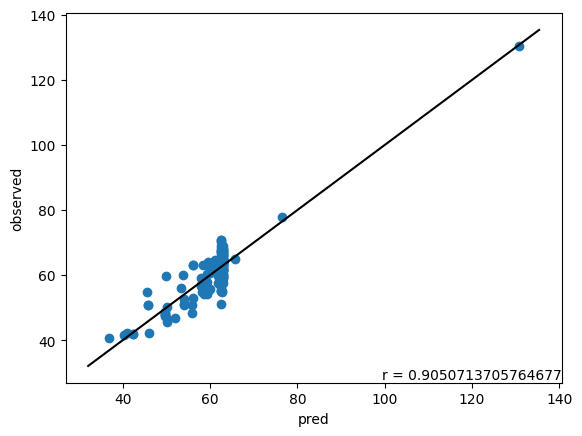

In [13]:
print(model)
pval=pearsonr(y_test,y_pred)
plt.scatter(y_pred, y_test)
ax=plt.gca()
plt.xlabel("pred")
plt.ylabel("observed")
plt.text(1, 0, f'r = {pval[0]}', horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]), 
]
ax.plot(lims, lims, 'k-')
plt.show()

In [14]:
allModels = []
for model in models1.keys():
    allModels.append(model)
for model in models2.keys():
    allModels.append(model)

MODEL NAME: LinearRegression 

REF: Shahane et al. 2019
bacterial membrane
Number of lipids:  132
Difference betweer predicted and literature (ML prediction and difference):  60.275187155783435 3.4751871557834377
Sum of fractions (should be 1):  1.0 

mammalian membrane
Difference betweer predicted and literature (ML prediction and difference):  44.98285259290289 2.8828525929028856
Sum of fractions (should be 1):  1.0 

cancer membrane
Difference betweer predicted and literature (ML prediction and difference):  51.482541012890835 5.382541012890833
Sum of fractions (should be 1):  1.01 

REF: Kumar et al. 2021
M13
Difference betweer predicted and literature (ML prediction and difference):  50.58459996141717 1.5245999614171666
Sum of fractions (should be 1):  1.0 

M12
Difference betweer predicted and literature (ML prediction and difference):  56.23408612619554 1.2640861261955436
Sum of fractions (should be 1):  1.0 

M11
Difference betweer predicted and literature (ML prediction and di

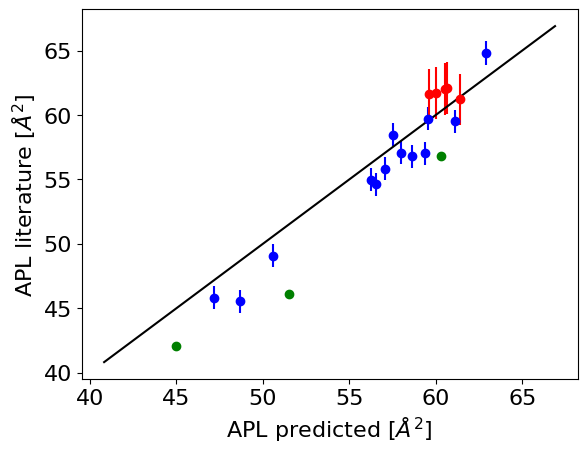

OVERALL SCORE (MAE, RMSE, r2, Pearson):  1.8408043380386832 2.1612476191123475 0.8118909497572236 0.9666720717492208 

MODEL NAME: Lasso 

REF: Shahane et al. 2019
bacterial membrane
Number of lipids:  132
Difference betweer predicted and literature (ML prediction and difference):  60.299741794977145 3.4997417949771474
Sum of fractions (should be 1):  1.0 

mammalian membrane
Difference betweer predicted and literature (ML prediction and difference):  45.06766485762063 2.967664857620626
Sum of fractions (should be 1):  1.0 

cancer membrane
Difference betweer predicted and literature (ML prediction and difference):  51.5694184479378 5.469418447937798
Sum of fractions (should be 1):  1.01 

REF: Kumar et al. 2021
M13
Difference betweer predicted and literature (ML prediction and difference):  52.47859561796659 3.418595617966588
Sum of fractions (should be 1):  1.0 

M12
Difference betweer predicted and literature (ML prediction and difference):  57.047165959491124 2.0771659594911256
Sum

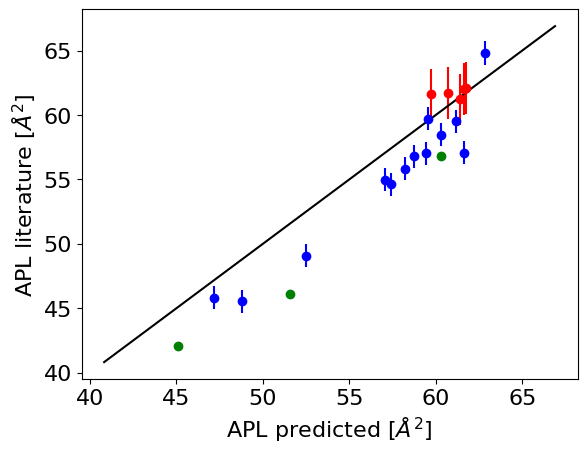

OVERALL SCORE (MAE, RMSE, r2, Pearson):  2.161608787530677 2.5602434739650684 0.7487099109404924 0.960918691430533 

MODEL NAME: Ridge 

REF: Shahane et al. 2019
bacterial membrane
Number of lipids:  132
Difference betweer predicted and literature (ML prediction and difference):  60.28202648221834 3.4820264822183447
Sum of fractions (should be 1):  1.0 

mammalian membrane
Difference betweer predicted and literature (ML prediction and difference):  45.003247191221796 2.9032471912217943
Sum of fractions (should be 1):  1.0 

cancer membrane
Difference betweer predicted and literature (ML prediction and difference):  51.49955415200861 5.399554152008612
Sum of fractions (should be 1):  1.01 

REF: Kumar et al. 2021
M13
Difference betweer predicted and literature (ML prediction and difference):  51.0619112792985 2.001911279298497
Sum of fractions (should be 1):  1.0 

M12
Difference betweer predicted and literature (ML prediction and difference):  56.44059649060742 1.47059649060742
Sum of 

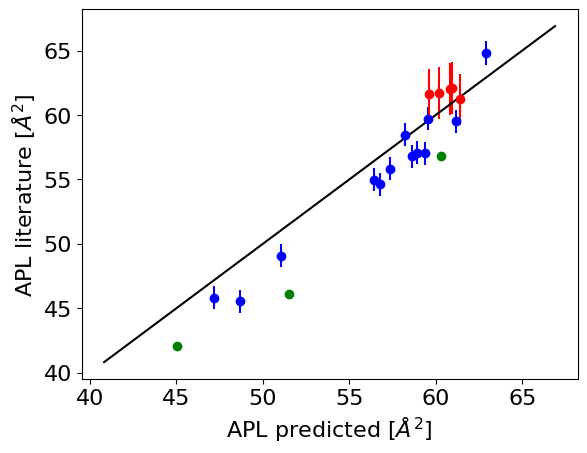

OVERALL SCORE (MAE, RMSE, r2, Pearson):  1.8777202580753514 2.2073106812116743 0.8049502893487701 0.9686618848172942 

MODEL NAME: ElasticNet 

REF: Shahane et al. 2019
bacterial membrane
Number of lipids:  132
Difference betweer predicted and literature (ML prediction and difference):  61.08720493894853 4.287204938948534
Sum of fractions (should be 1):  1.0 

mammalian membrane
Difference betweer predicted and literature (ML prediction and difference):  50.222302593405324 8.122302593405323
Sum of fractions (should be 1):  1.0 

cancer membrane
Difference betweer predicted and literature (ML prediction and difference):  55.30782774427442 9.207827744274418
Sum of fractions (should be 1):  1.01 

REF: Kumar et al. 2021
M13
Difference betweer predicted and literature (ML prediction and difference):  55.69241446576959 6.632414465769585
Sum of fractions (should be 1):  1.0 

M12
Difference betweer predicted and literature (ML prediction and difference):  58.76925324041533 3.7992532404153323

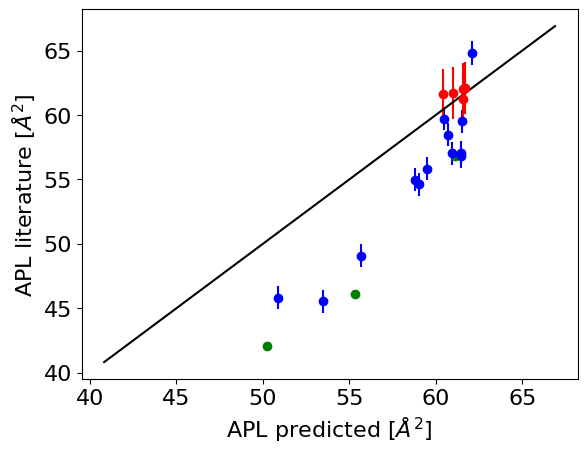

OVERALL SCORE (MAE, RMSE, r2, Pearson):  3.6594593478584576 4.494917125227854 -0.5932117993908106 0.9363456148576265 

MODEL NAME: DecisionTreeRegressor 

REF: Shahane et al. 2019
bacterial membrane
Number of lipids:  132
Difference betweer predicted and literature (ML prediction and difference):  61.01296163375002 4.2129616337500195
Sum of fractions (should be 1):  1.0 

mammalian membrane
Difference betweer predicted and literature (ML prediction and difference):  43.2752613813921 1.1752613813920973
Sum of fractions (should be 1):  1.0 

cancer membrane
Difference betweer predicted and literature (ML prediction and difference):  64.94232329086424 18.842323290864236
Sum of fractions (should be 1):  1.01 

REF: Kumar et al. 2021
M13
Difference betweer predicted and literature (ML prediction and difference):  64.94232329086424 15.882323290864235
Sum of fractions (should be 1):  1.0 

M12
Difference betweer predicted and literature (ML prediction and difference):  61.01296163375002 6.042

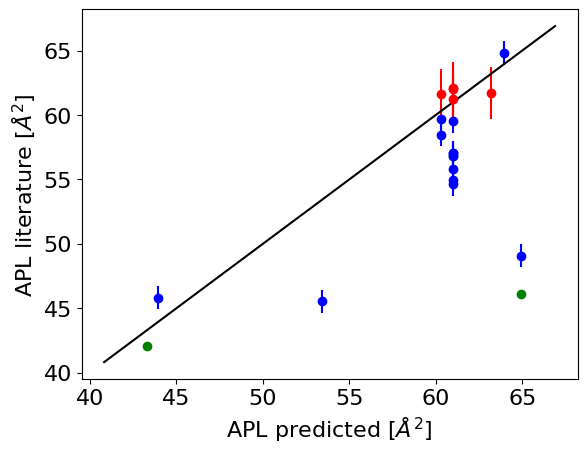

OVERALL SCORE (MAE, RMSE, r2, Pearson):  4.260072752519143 6.393096996562736 -0.2960823497109324 0.6186008975122813 

MODEL NAME: RandomForestRegressor 

REF: Shahane et al. 2019
bacterial membrane
Number of lipids:  132
Difference betweer predicted and literature (ML prediction and difference):  59.45673245256084 2.6567324525608456
Sum of fractions (should be 1):  1.0 

mammalian membrane
Difference betweer predicted and literature (ML prediction and difference):  51.99214986188902 9.892149861889017
Sum of fractions (should be 1):  1.0 

cancer membrane
Difference betweer predicted and literature (ML prediction and difference):  56.018776470784275 9.918776470784273
Sum of fractions (should be 1):  1.01 

REF: Kumar et al. 2021
M13
Difference betweer predicted and literature (ML prediction and difference):  53.91789122480964 4.857891224809634
Sum of fractions (should be 1):  1.0 

M12
Difference betweer predicted and literature (ML prediction and difference):  54.15282656794819 -0.8171

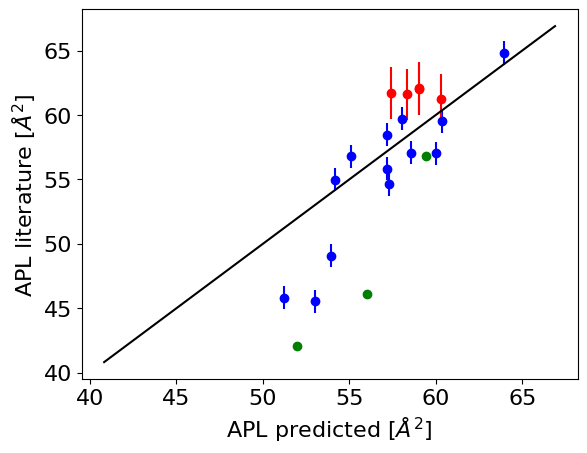

OVERALL SCORE (MAE, RMSE, r2, Pearson):  3.3577180599357255 4.313359686748819 -1.0109036068400377 0.8394685053592226 

MODEL NAME: GradientBoostingRegressor 

REF: Shahane et al. 2019
bacterial membrane
Number of lipids:  132
Difference betweer predicted and literature (ML prediction and difference):  59.83628613204529 3.0362861320452907
Sum of fractions (should be 1):  1.0 

mammalian membrane
Difference betweer predicted and literature (ML prediction and difference):  44.75473141452143 2.6547314145214287
Sum of fractions (should be 1):  1.0 

cancer membrane
Difference betweer predicted and literature (ML prediction and difference):  53.949018356423245 7.849018356423244
Sum of fractions (should be 1):  1.01 

REF: Kumar et al. 2021
M13
Difference betweer predicted and literature (ML prediction and difference):  53.47631314364304 4.416313143643038
Sum of fractions (should be 1):  1.0 

M12
Difference betweer predicted and literature (ML prediction and difference):  60.215442335971424 

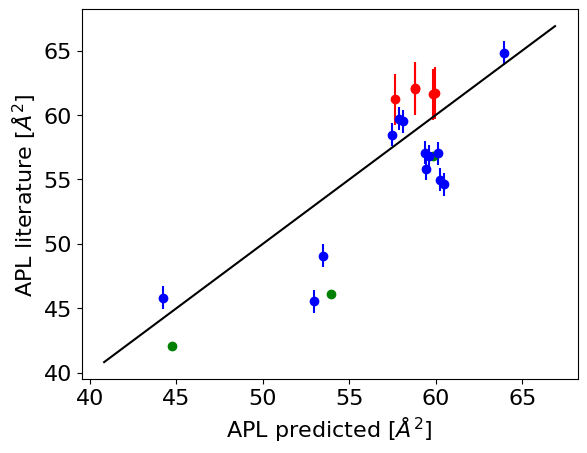

OVERALL SCORE (MAE, RMSE, r2, Pearson):  3.2696540753425385 3.778432921807061 0.37987706340788796 0.8301671625093413 

MODEL NAME: AdaBoostRegressor 

REF: Shahane et al. 2019
bacterial membrane
Number of lipids:  132
Difference betweer predicted and literature (ML prediction and difference):  60.49841708791102 3.698417087911025
Sum of fractions (should be 1):  1.0 

mammalian membrane
Difference betweer predicted and literature (ML prediction and difference):  44.25114243197834 2.151142431978336
Sum of fractions (should be 1):  1.0 

cancer membrane
Difference betweer predicted and literature (ML prediction and difference):  53.35724054678053 7.25724054678053
Sum of fractions (should be 1):  1.01 

REF: Kumar et al. 2021
M13
Difference betweer predicted and literature (ML prediction and difference):  53.35724054678053 4.297240546780529
Sum of fractions (should be 1):  1.0 

M12
Difference betweer predicted and literature (ML prediction and difference):  61.96620518424512 6.99620518424

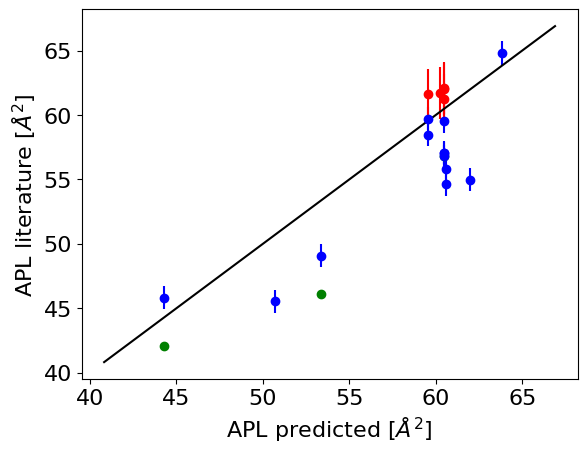

OVERALL SCORE (MAE, RMSE, r2, Pearson):  2.9929621314744614 3.633252944181276 0.5378497700959821 0.8794482314156292 

MODEL NAME: KNeighborsRegressor 

REF: Shahane et al. 2019
bacterial membrane
Number of lipids:  132
Difference betweer predicted and literature (ML prediction and difference):  57.76082636580979 0.960826365809794
Sum of fractions (should be 1):  1.0 

mammalian membrane
Difference betweer predicted and literature (ML prediction and difference):  50.62801391589593 8.528013915895926
Sum of fractions (should be 1):  1.0 

cancer membrane
Difference betweer predicted and literature (ML prediction and difference):  52.18722427346104 6.08722427346104
Sum of fractions (should be 1):  1.01 

REF: Kumar et al. 2021
M13
Difference betweer predicted and literature (ML prediction and difference):  52.83666548313446 3.776665483134458
Sum of fractions (should be 1):  1.0 

M12
Difference betweer predicted and literature (ML prediction and difference):  57.28926022244938 2.3192602224

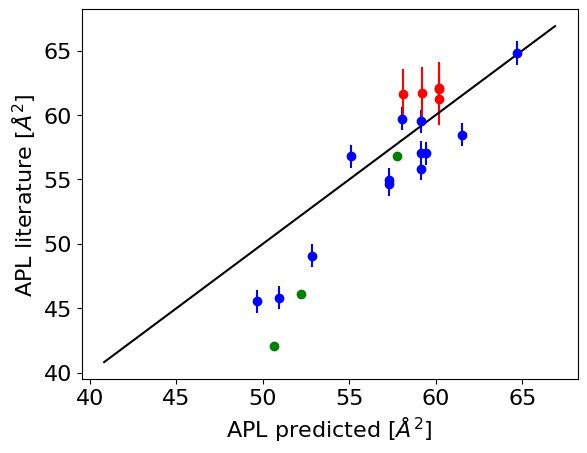

OVERALL SCORE (MAE, RMSE, r2, Pearson):  2.8143111847585978 3.407069169448194 0.21735174865431717 0.9254296122487317 

MODEL NAME: MLPRegressor 

REF: Shahane et al. 2019
bacterial membrane
Number of lipids:  132
Difference betweer predicted and literature (ML prediction and difference):  60.53217008322948 3.7321700832294837
Sum of fractions (should be 1):  1.0 

mammalian membrane
Difference betweer predicted and literature (ML prediction and difference):  44.33827474488702 2.238274744887022
Sum of fractions (should be 1):  1.0 

cancer membrane
Difference betweer predicted and literature (ML prediction and difference):  50.21760985940322 4.117609859403217
Sum of fractions (should be 1):  1.01 

REF: Kumar et al. 2021
M13
Difference betweer predicted and literature (ML prediction and difference):  50.32771031174462 1.2677103117446151
Sum of fractions (should be 1):  1.0 

M12
Difference betweer predicted and literature (ML prediction and difference):  56.17265779047569 1.2026577904756

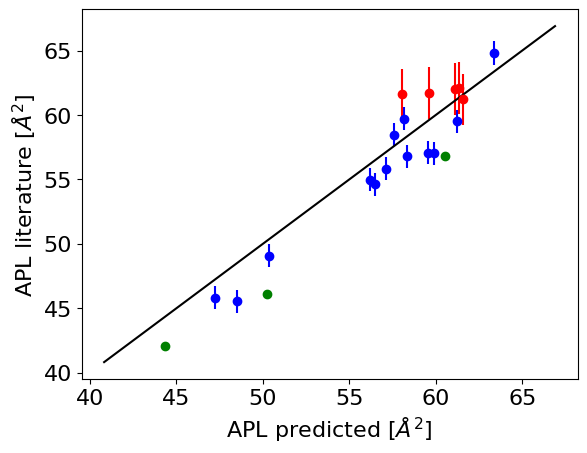

OVERALL SCORE (MAE, RMSE, r2, Pearson):  1.9166919524788446 2.164985851595305 0.8275576610424344 0.9573543767473872 

MODEL NAME: XGBRegressor 

REF: Shahane et al. 2019
bacterial membrane
Number of lipids:  132
Difference betweer predicted and literature (ML prediction and difference):  58.554886 1.7548858642578153
Sum of fractions (should be 1):  1.0 

mammalian membrane
Difference betweer predicted and literature (ML prediction and difference):  47.276993 5.176992797851561
Sum of fractions (should be 1):  1.0 

cancer membrane
Difference betweer predicted and literature (ML prediction and difference):  61.090496 14.99049606323242
Sum of fractions (should be 1):  1.01 

REF: Kumar et al. 2021
M13
Difference betweer predicted and literature (ML prediction and difference):  61.767994 12.70799392700195
Sum of fractions (should be 1):  1.0 

M12
Difference betweer predicted and literature (ML prediction and difference):  61.529396 6.559396057128907
Sum of fractions (should be 1):  1.0 



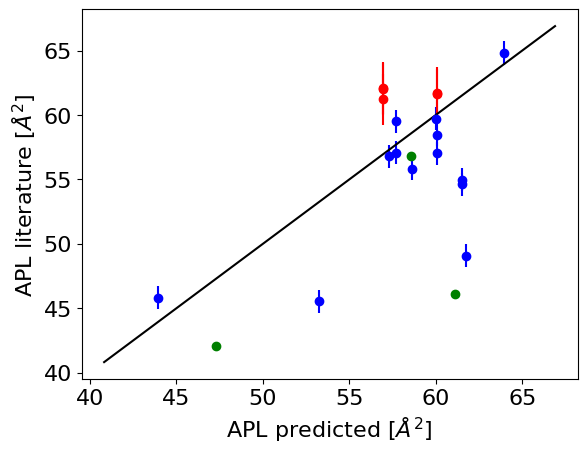

OVERALL SCORE (MAE, RMSE, r2, Pearson):  4.137068721226284 5.6471139187377535 -0.5060726864853895 0.5692748224768448 



In [15]:
for modelName in allModels:
    print('MODEL NAME:', modelName,'\n')
    model = joblib.load(f'../Data/APLpredictor/' + modelName + '/model.pkl')
        
    testAgainstLiterature = makeTestAgainstLiterature(lipidHGnamesList,model)
    
    yerror = []
    for i in testAgainstLiterature[2]:
       
        if i == 0:
            yerror.append(0.1)
        if i == 1:
            yerror.append(0.9)
        if i == 3:
            yerror.append(2)
    
    
    #print(yerror)
    for i,x in enumerate(testAgainstLiterature[0]):
        if testAgainstLiterature[2][i] == 0: color = 'green'
        if testAgainstLiterature[2][i] == 1: color = 'blue'
        if testAgainstLiterature[2][i] == 3: color = 'red'
        #plt.scatter(testAgainstLiterature[0][i],testAgainstLiterature[1][i], c=testAgainstLiterature[2][i])
        plt.errorbar(testAgainstLiterature[0][i],testAgainstLiterature[1][i], yerr=yerror[i], fmt='o',c=color)
    #plt.scatter(testAgainstLiterature[0],testAgainstLiterature[1], c=testAgainstLiterature[2])
    #plt.errorbar(testAgainstLiterature[0],testAgainstLiterature[1], yerr=yerror, fmt='none')
    ax=plt.gca()
    plt.xlabel("APL predicted [$\AA^2$]", size = 16)
    plt.xticks(size = 16)
    plt.ylabel("APL literature [$\AA^2$]", size = 16)
    plt.yticks(size = 16)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  
        np.max([ax.get_xlim(), ax.get_ylim()]), 
    ]
    #print(lims)
    ax.plot(lims, lims, 'k-')
    
    #pval=pearsonr(testAgainstLiterature[0],testAgainstLiterature[1])    
    #plt.text(1, 0, f'r = {pval[0]}', horizontalalignment='right',
    #    verticalalignment='bottom',
    #    transform=ax.transAxes)
    
    plt.savefig('./' + modelName + '/test.pdf')
    plt.show()
    mae, rmse, r2, pval =score(testAgainstLiterature[0],testAgainstLiterature[1])
    print('OVERALL SCORE (MAE, RMSE, r2, Pearson): ', mae, rmse, r2, pval , '\n')
    

# Predicting area per lipid for membrane compositions corresponding different cellular membranes using linear regression model 

<a id='another_cell'></a>

In [16]:
model = joblib.load(f'../Data/APLpredictor/LinearRegression/model.pkl')


In [17]:
#ER membrane mammal
print('Area per lipid predicted for ER membrane:')

lips=['PClipids', 'PElipids', 'PIlipids','PSlipids','SMlipids','CHOL']
comp=[0.54,0.20,0.11,0.04,0.04,0.08]
single_pred=model.predict(APLquery(lips, comp, lipidHGnamesList))
print(single_pred)
print(sum(comp))
ERmembraneAPL = single_pred


Area per lipid predicted for ER membrane:
[56.78503337]
1.01


In [18]:
# Plasma membrane 
print('Prediction of area per lipid for plasma membrane:')

lips=['PClipids', 'PElipids', 'PIlipids','PSlipids','SMlipids','CHOL']
comp=[0.23,        0.11,        0.07,      0.08,       0.17,    0.34]
single_pred=model.predict(APLquery(lips, comp, lipidHGnamesList))
print(single_pred)
print(sum(comp))
plasmaMembraneAPL = single_pred


Prediction of area per lipid for plasma membrane:
[44.64389623]
1.0


In [19]:
# mitochondrio
print('Predicting area per lipid for mitochondrio')

lips=['PClipids', 'PElipids', 'PIlipids','CLlipids','CHOL']
comp=[0.37,          0.31,       0.06,       0.22,   0.04]
single_pred=model.predict(APLquery(lips, comp, lipidHGnamesList))
print(single_pred)
print(sum(comp))
mitoMembraneAPL = single_pred

print('Correction for area per chain for cardiolipin')
mitoMembraneAPLperchain = mitoMembraneAPL-mitoMembraneAPL*0.22/2
print(mitoMembraneAPLperchain)


Predicting area per lipid for mitochondrio
[74.27344256]
1.0
Correction for area per chain for cardiolipin
[66.10336388]


In [20]:
# golgi
print('Prediction area per lipid for golgi')

lips=['PClipids', 'PElipids', 'PIlipids','PSlipids','SMlipids','CHOL']
comp=[0.36,          0.21,       0.12,       0.06,    0.07,     0.18]
single_pred=model.predict(APLquery(lips, comp, lipidHGnamesList))
print(single_pred)
print(sum(comp))
golgiMembranAPL = single_pred 


Prediction area per lipid for golgi
[51.82734673]
1.0


In [21]:
# bacteria
print('Predicting area per lipid for bacterial membrane')

lips=['PGlipids', 'PElipids', 'PClipids', 'CLlipids','CHOL']
comp=[0.35,        0.35,        0.2,         0.05,   0.05]
single_pred=model.predict(APLquery(lips, comp, lipidHGnamesList))
print(single_pred)
print(sum(comp))
bacteriaMembraneAPL = single_pred

Predicting area per lipid for bacterial membrane
[62.56240982]
1.0


In [22]:
# Synaptic vesicle from https://doi.org/10.1016/j.abb.2021.108966
print('Predicting area per lipid for synaptic vesicle')

####Phosphatidylcholine (PC)	~
#print(np.average([17,32,25]))
#####Phosphatidylethanolamine (PE)	~
#print(np.average([20,20,20]))
#####Phosphatidylserine (PS)	~
#print(np.average([6,6,10]))
#####Phosphatidylinositol (PIns)	~
#print(np.average([1,2,4]))
#####Sphingomyelin (SM)	~
#print(np.average([4,3,5]))
#####Cholesterol (CHOL)	~
#print(np.average([40,33,33]))


lips=['PClipids', 'PElipids','PSlipids', 'PIlipids','SMlipids','CHOL']
comp=[0.28,0.20,0.09,0.02,0.04,0.37]
single_pred=model.predict(APLquery(lips, comp, lipidHGnamesList))
print(single_pred)
print(sum(comp))
synapticMembraneAPL = single_pred

Predicting area per lipid for synaptic vesicle
[44.73840142]
1.0


In [23]:
# Influenza virus from http://dx.doi.org/10.1021/acsinfecdis.5b00040 and https://doi.org/10.1083/jcb.201108175

print('Area per lipid prediction for inzluenza virus')
cholFraction = 0.4
lipidFraction = 1- cholFraction
PCfraction = lipidFraction*0.01*np.average([9,7.5,6.3])
PEfraction = lipidFraction*0.01*np.average([48.3,47.9,54.5])
PSfraction = lipidFraction*0.01*np.average([24.4,24.5,24.7])
SMfraction = lipidFraction*0.01*np.average([14.9,17.6,12.6])


lips=['PClipids', 'PElipids','PSlipids', 'SMlipids','CHOL']
comp=[PCfraction,PEfraction+0.0166,PSfraction,SMfraction,cholFraction]
single_pred=model.predict(APLquery(lips, comp, lipidHGnamesList))
print(single_pred)
print(sum(comp))
influenzaMembraneAPL = single_pred

Area per lipid prediction for inzluenza virus
[42.38141875]
1.001


In [24]:
print(ERmembraneAPL)
print(plasmaMembraneAPL)
print(mitoMembraneAPL,mitoMembraneAPLperchain)
print(golgiMembranAPL)
print(bacteriaMembraneAPL)
print(synapticMembraneAPL)
print(influenzaMembraneAPL)

[56.78503337]
[44.64389623]
[74.27344256] [66.10336388]
[51.82734673]
[62.56240982]
[44.73840142]
[42.38141875]
